# Exploratory Data Analysis

Let's have a closer look at our data

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split

In [15]:
warnings.simplefilter(action='ignore', category=UserWarning)

We will be working with july subset for speed and simplicity

In [4]:
df = pd.read_csv('data/july.csv', index_col='Unnamed: 0')

**Columns and values**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44640 entries, 2020-07-01 00:00:00 to 2020-07-31 23:59:00
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   sensor.ac_power               44640 non-null  float64
 1   sensor.atmospheric_pressure   44640 non-null  float64
 2   sensor.bathroom_humidity      44640 non-null  float64
 3   sensor.bathroom_temperature   44640 non-null  float64
 4   sensor.equipment_temperature  44640 non-null  float64
 5   sensor.kitchen_humidity       44640 non-null  float64
 6   sensor.kitchen_temperature    44640 non-null  float64
 7   sensor.office_co2             43448 non-null  float64
 8   sensor.room_humidity          44640 non-null  float64
 9   sensor.room_temperature       44640 non-null  float64
 10  sensor.weather_humidity       44640 non-null  float64
 11  sensor.weather_temperature    44640 non-null  float64
 12  binary_sensor.balcony_door    446

In [6]:
df.head(3)

,sensor.ac_power,sensor.atmospheric_pressure,sensor.bathroom_humidity,sensor.bathroom_temperature,sensor.equipment_temperature,sensor.kitchen_humidity,sensor.kitchen_temperature,sensor.office_co2,sensor.room_humidity,sensor.room_temperature,...,sensor.weather_temperature,binary_sensor.balcony_door,binary_sensor.kitchen_window,binary_sensor.room_window,climate.air_conditioner,climate.air_conditioner_old,cover.balcony,cover.windows,person.one,person.two
2020-07-01 00:00:00,1.0,1004.0,42.0,24.5,29.7,39.5,23.8,NaN,38.3,22.6,...,18.7,on,off,off,off,NaN,open,open,not_home,not_home
2020-07-01 00:01:00,1.0,1004.0,42.0,24.5,29.7,39.5,23.8,NaN,38.3,22.6,...,18.7,on,off,off,off,NaN,open,open,not_home,not_home
2020-07-01 00:02:00,1.0,1004.0,42.0,24.5,29.7,39.5,23.8,NaN,38.3,22.6,...,18.7,on,off,off,off,NaN,open,open,not_home,not_home


*Data owner insight*:
'climate.air_conditioner_old' column exist through the all data, when in fact it was introduced only in August, when 'climate.air_conditioner' was replaced with newer model

In [7]:
df.drop(['climate.air_conditioner_old'], axis=1, inplace=True)

In [8]:
df.shape

(44640, 20)

In [9]:
df.columns

Index(['sensor.ac_power', 'sensor.atmospheric_pressure',
       'sensor.bathroom_humidity', 'sensor.bathroom_temperature',
       'sensor.equipment_temperature', 'sensor.kitchen_humidity',
       'sensor.kitchen_temperature', 'sensor.office_co2',
       'sensor.room_humidity', 'sensor.room_temperature',
       'sensor.weather_humidity', 'sensor.weather_temperature',
       'binary_sensor.balcony_door', 'binary_sensor.kitchen_window',
       'binary_sensor.room_window', 'climate.air_conditioner', 'cover.balcony',
       'cover.windows', 'person.one', 'person.two'],
      dtype='object')

**Pairplots**

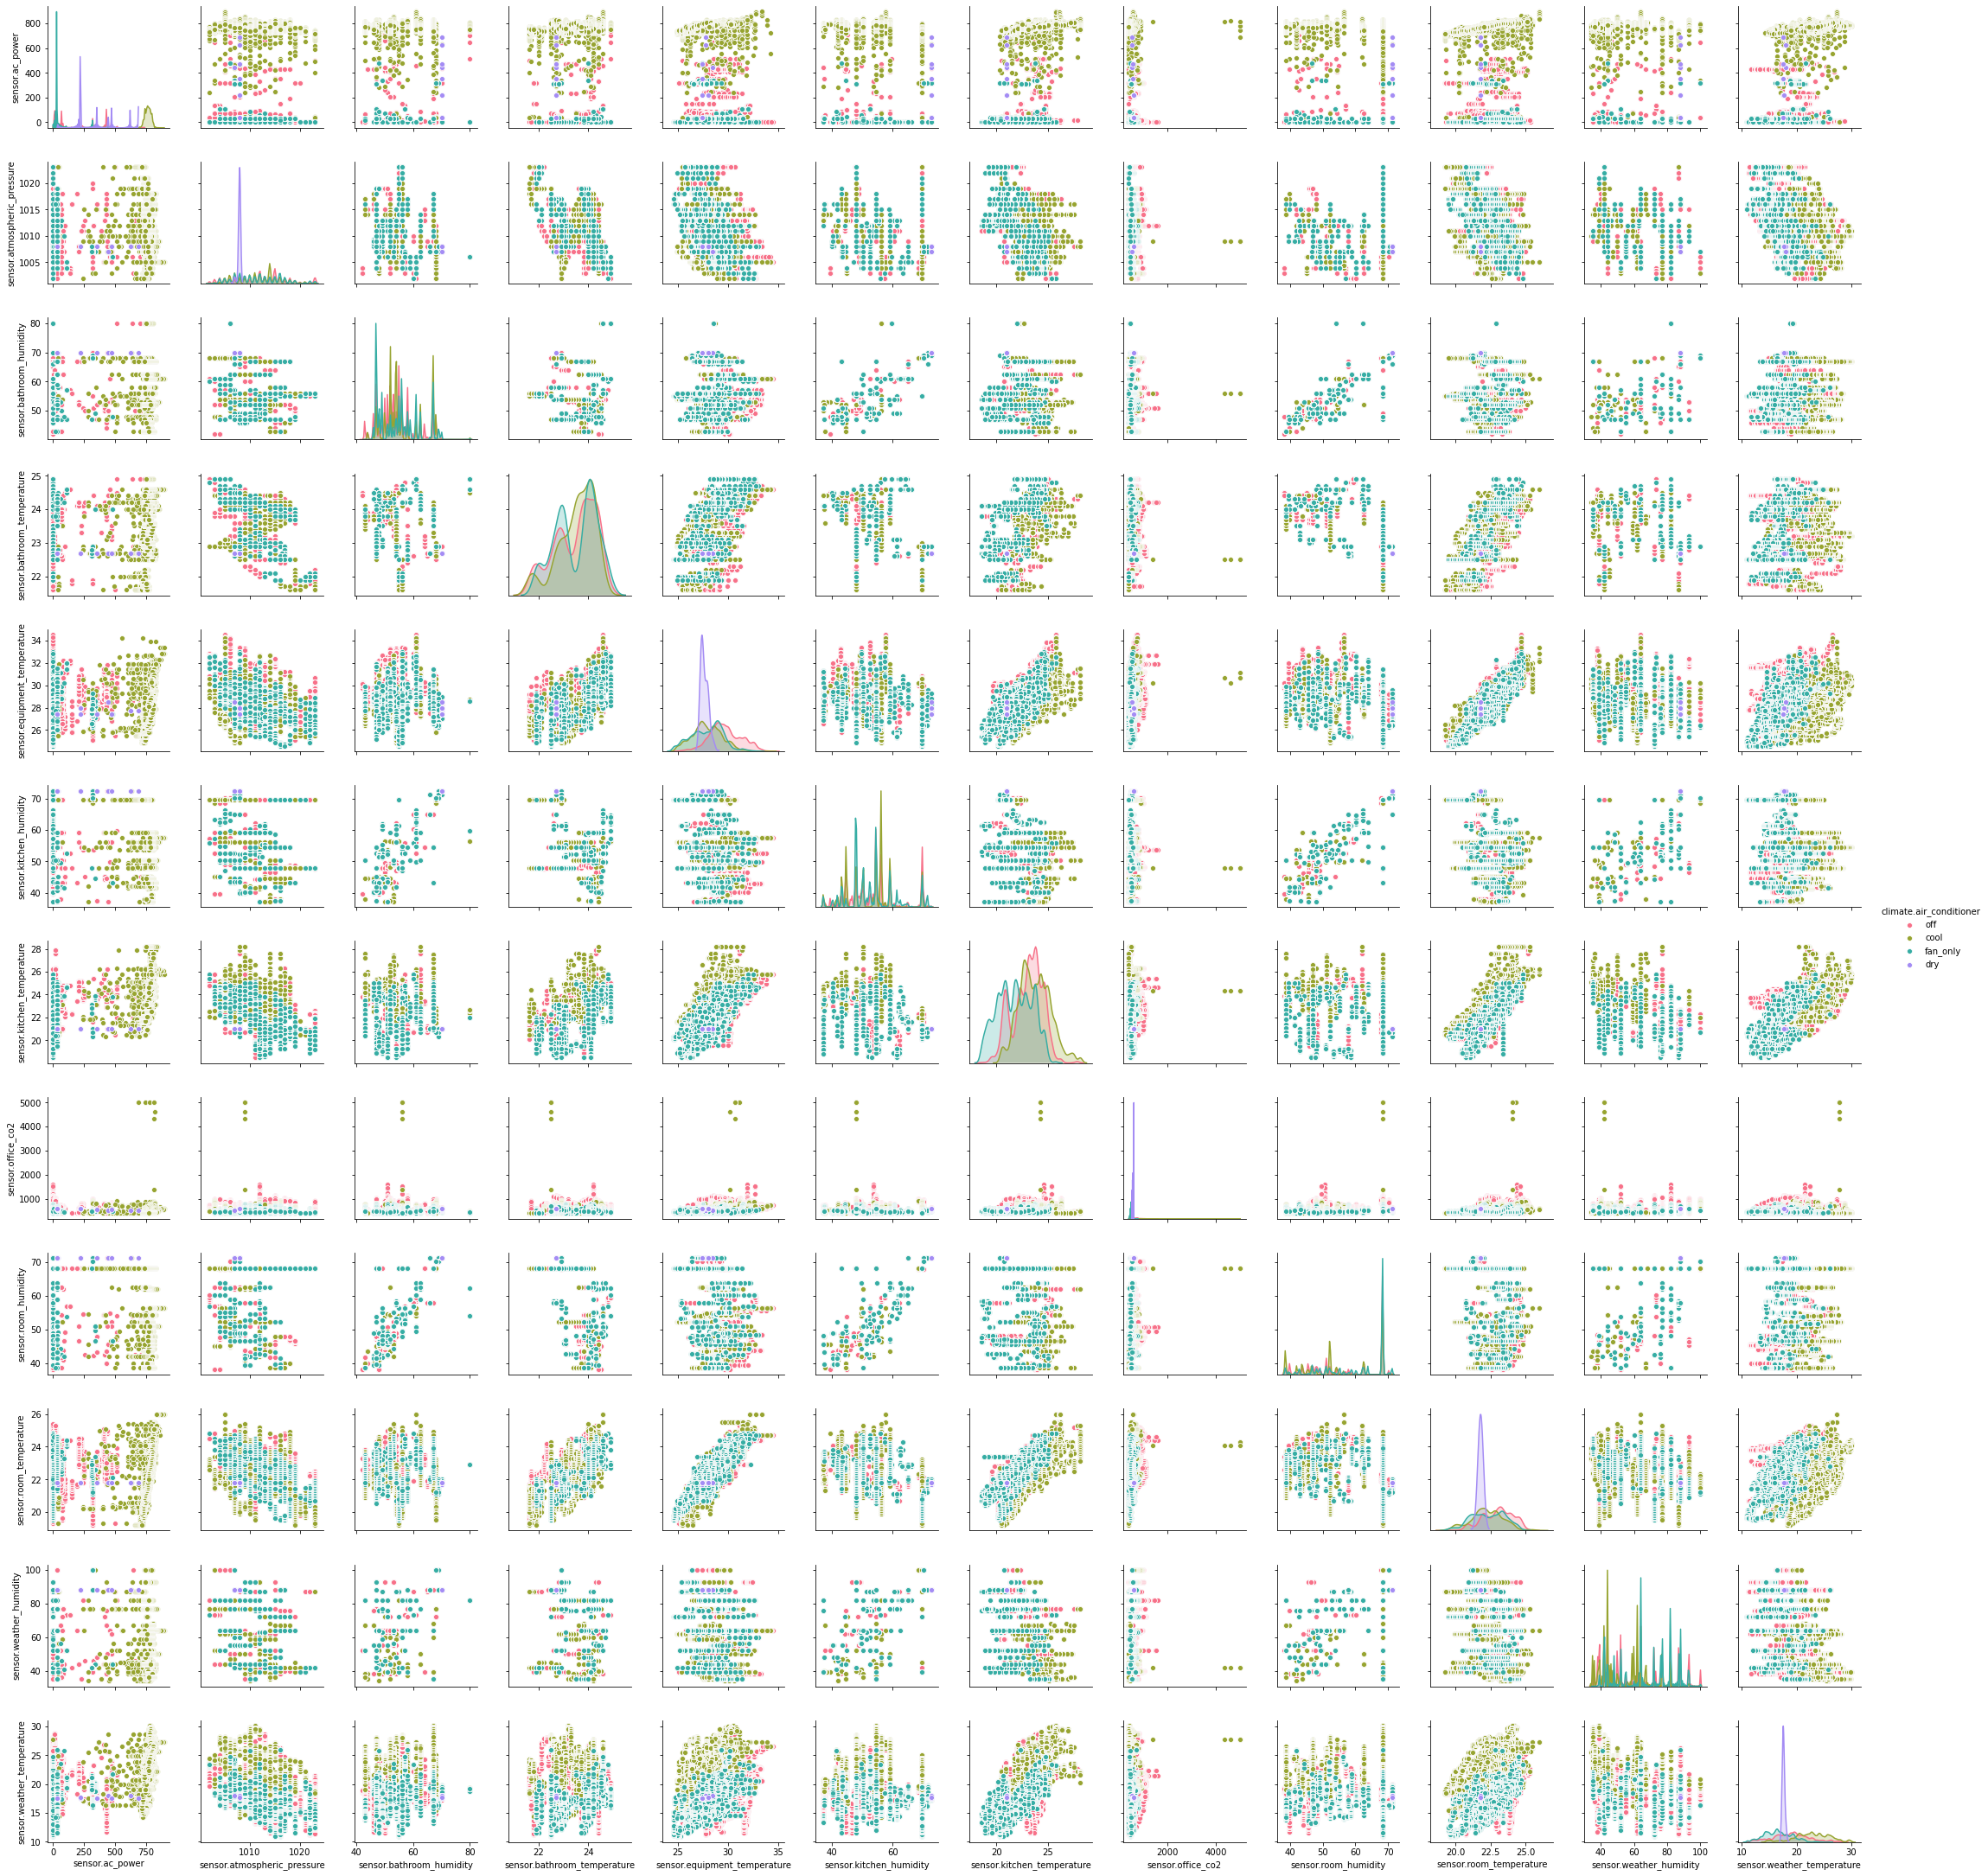

In [16]:
sns_paiplot = sns.pairplot(df, hue='climate.air_conditioner', palette="husl", diag_kws={'bw': 0.2})

Looks impressive, but let's be honest - not very informative.
Let's look on the data that might be inderdependant, collinear, etc.

**Humidity pairplot**

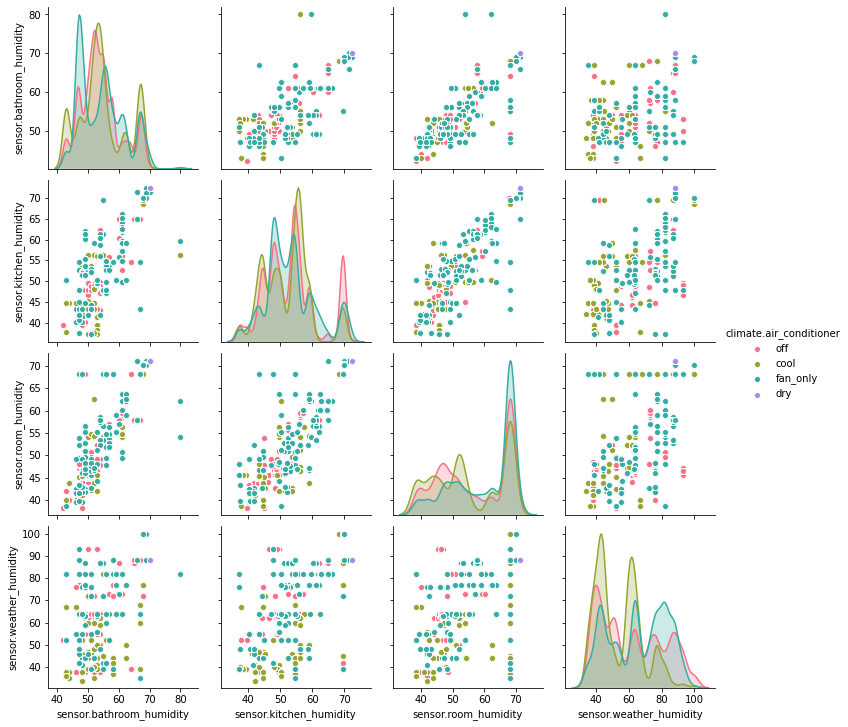

In [26]:
sns_paiplot = sns.pairplot(df[['climate.air_conditioner',
                                     'sensor.bathroom_humidity',
                                     'sensor.kitchen_humidity',
                                     'sensor.room_humidity',
                                     'sensor.weather_humidity']],
                           hue='climate.air_conditioner', palette="husl")

Some observations:
- outside humidity does not show strong relation to inside humidity
- colling mode of air conditioner was mostly used when outside humidity is low:
    - remembering that it's relative humidity, the simplest explanation is that cooling was used on the hot days
- kitchen, room and bathroom humidity are interdependant
    - if we decide to use them in our model, we can work with only one of them (room) or average value
    
**Temperature pairplot**

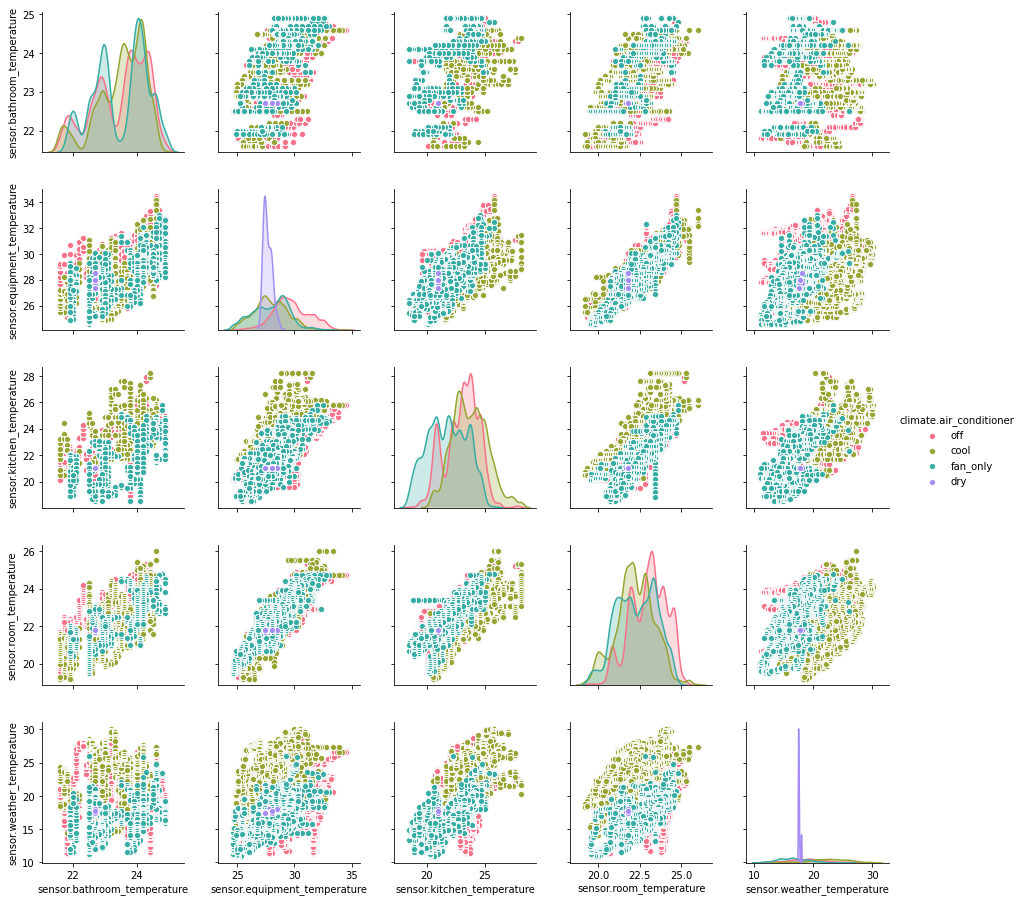

In [24]:
sns_paiplot = sns.pairplot(df[['sensor.bathroom_temperature',
                                     'sensor.equipment_temperature',
                                     'sensor.kitchen_temperature',
                                     'sensor.room_temperature',
                                     'sensor.weather_temperature',
                                     'climate.air_conditioner']],
                          hue='climate.air_conditioner', palette="husl")

Some observations:
- outside temperature is more related to inside temperature, then it was with humidity
- kitchen, room and equipment temperature are collineary dependant
- bathroom temperature correlate less with other inside temperatures ("bathroom microclimat")
    - it make sence to exclude bathroom temperature for our model
- we can work with only room or average of room, kitchen and maybe equipment temperature
    - for simplisity we worked with room temperature
- data for "dry mode" looks deficient

**Let's also look how out data shows up on the heatmap**

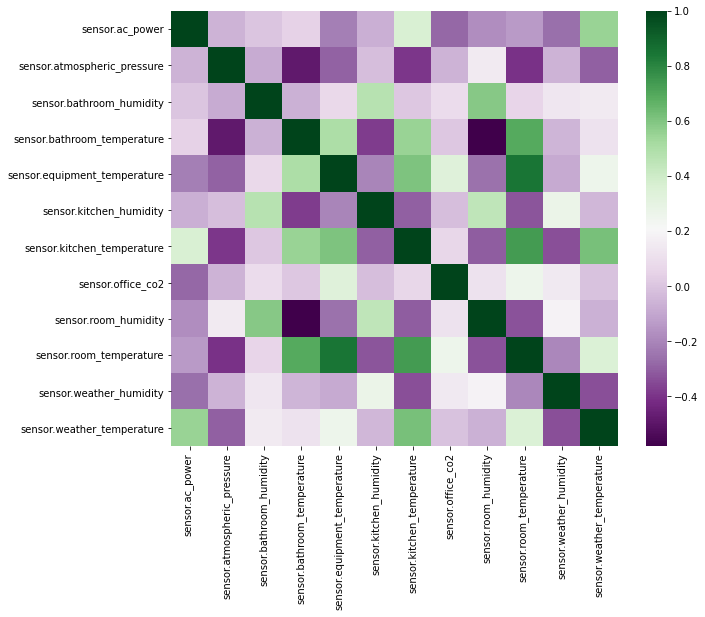

In [23]:
plt.rcParams['figure.figsize'] = (10,8)
sns.heatmap(df.corr(), cmap="PRGn")

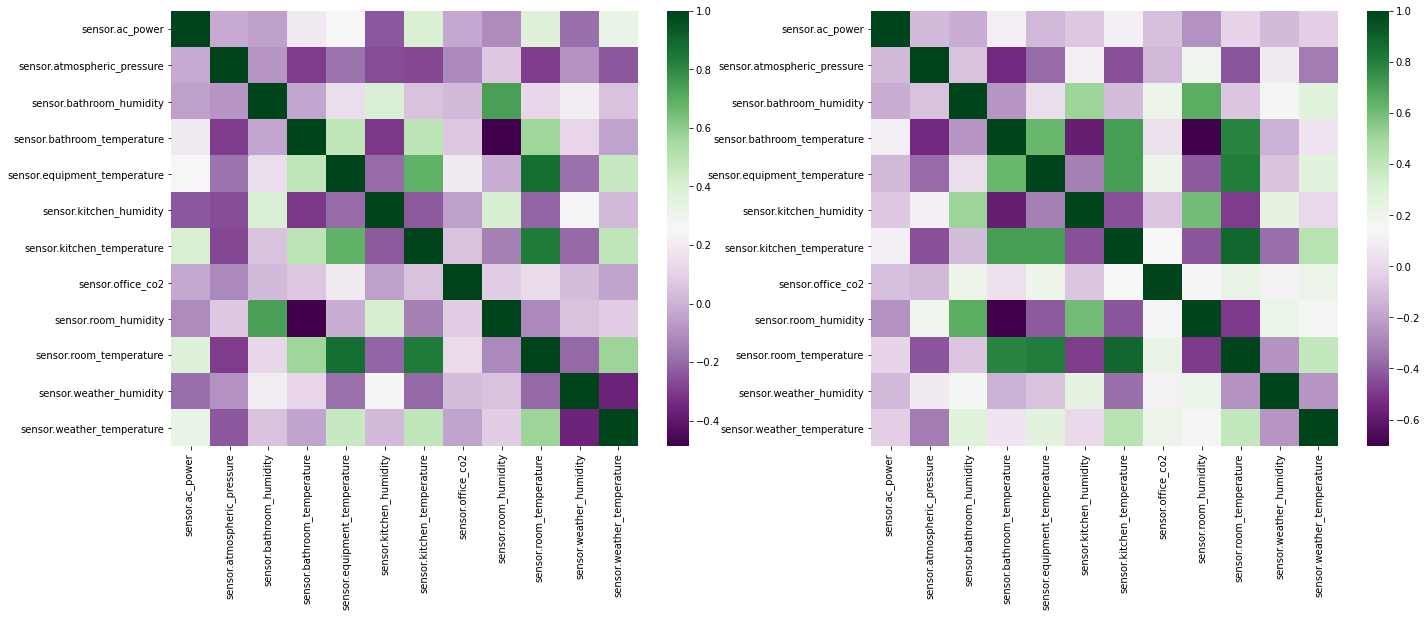

In [51]:
plt.rcParams['figure.figsize'] = (23,8)
fig, ax = plt.subplots(1,2)
sns.heatmap(df[df['climate.air_conditioner'] == 'cool'].corr(), cmap="PRGn", ax=ax[0])
sns.heatmap(df[df['climate.air_conditioner'] == 'off'].corr(), cmap="PRGn", ax=ax[1])

Some observations!
# ADD OBSERVATIONS

**How often actually conditioning worked**

In [56]:
df[['climate.air_conditioner', 'person.one']].groupby('climate.air_conditioner').count()

,person.one
climate.air_conditioner,
cool,12312
dry,18
fan_only,14408
off,17902


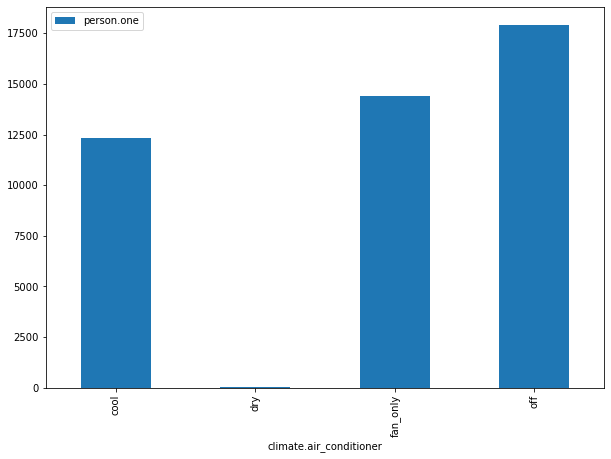

In [57]:
df[['climate.air_conditioner', 'person.one']].groupby('climate.air_conditioner').count().plot.bar()

Can we actually see the difference in temperature, when AC is on or off?

In [58]:
temp_graph = df[['climate.air_conditioner',
          'sensor.room_temperature',
          'sensor.weather_temperature']].groupby('climate.air_conditioner').mean()
temp_graph['AC Mode'] = temp_graph.index
temp_graph['Room'] = temp_graph['sensor.room_temperature']
del temp_graph['sensor.room_temperature']
temp_graph['Outside'] = temp_graph['sensor.weather_temperature']
del temp_graph['sensor.weather_temperature']
temp_graph = temp_graph.melt('AC Mode', var_name='Location', value_name='Temperature')
temp_graph

,AC Mode,Location,Temperature
0,cool,Room,22.245915
1,dry,Room,21.788889
2,fan_only,Room,22.335161
3,off,Room,23.031399
4,cool,Outside,22.816285
5,dry,Outside,17.600000
6,fan_only,Outside,16.599195
7,off,Outside,19.062915


Text(0.5, 1.0, 'Temperature difference for various AC mode')

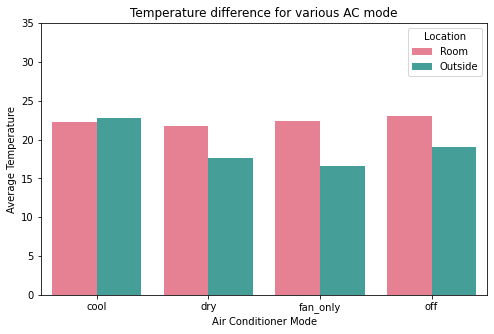

In [60]:
plt.rcParams['figure.figsize'] = (8,5)
plt.axis(ymin=0, ymax=35)
ax = sns.barplot(x='AC Mode', y='Temperature', hue='Location', data=temp_graph, palette="husl")
ax.set(xlabel='Air Conditioner Mode', ylabel='Average Temperature')
plt.title("Temperature difference for various AC mode")

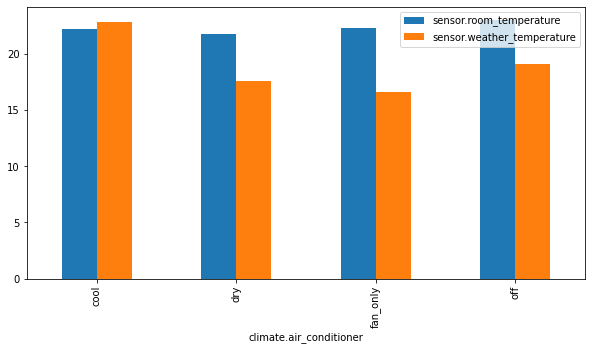

In [39]:
df_train[['climate.air_conditioner', 'sensor.room_temperature', 'sensor.weather_temperature']].groupby('climate.air_conditioner').mean().plot.bar()

In [ ]:
df_train[['climate.air_conditioner',
          'sensor.room_humidity',
          'sensor.weather_humidity']].groupby('climate.air_conditioner').mean().plot.bar()

In [38]:
gra_df = df_train[['climate.air_conditioner',
          'sensor.room_humidity',
          'sensor.weather_humidity']].groupby('climate.air_conditioner').mean()
gra_df['AC Mode'] = gra_df.index
gra_df.melt('AC Mode', var_name='location', value_name='humidity')

,AC Mode,location,humidity
0,cool,sensor.room_humidity,55.239020
1,dry,sensor.room_humidity,71.200000
2,fan_only,sensor.room_humidity,60.220502
3,off,sensor.room_humidity,56.620683
4,cool,sensor.weather_humidity,53.984984
5,dry,sensor.weather_humidity,88.000000
6,fan_only,sensor.weather_humidity,65.535112
7,off,sensor.weather_humidity,61.814200


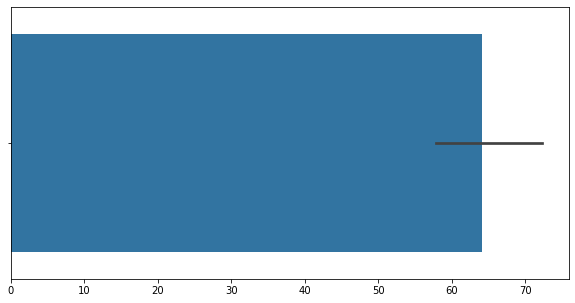

In [32]:
plt.rcParams['figure.figsize'] = (10,5)
plt.axis(ymin=0, ymax=100)
sns.barplot(df_train[['climate.air_conditioner',
          'sensor.room_humidity',
          'sensor.weather_humidity']].groupby('climate.air_conditioner').mean())

#### Let's check the effect of atmospheric pressure on temperature

C:\Users\asyap\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\asyap\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\asyap\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\asyap\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


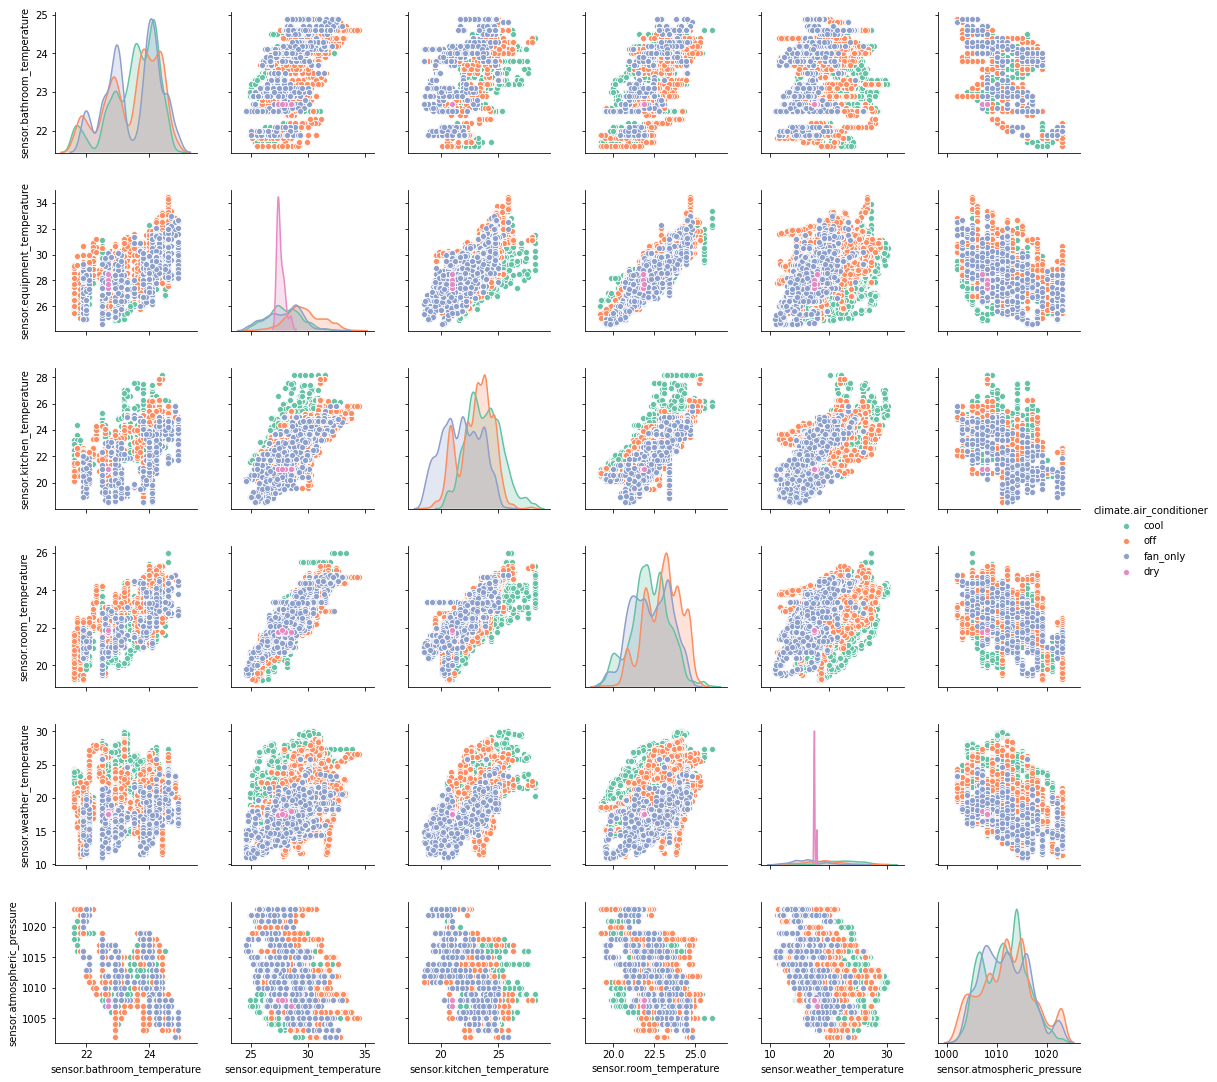

In [22]:
sns.pairplot(df_train[['sensor.bathroom_temperature',
                                     'sensor.equipment_temperature',
                                     'sensor.kitchen_temperature',
                                     'sensor.room_temperature',
                                     'sensor.weather_temperature',
                                     'sensor.atmospheric_pressure',
                                     'climate.air_conditioner']],
            hue='climate.air_conditioner',
            palette="Set2")
plt.savefig(os.path.join('./images', 'pairplot.png'))

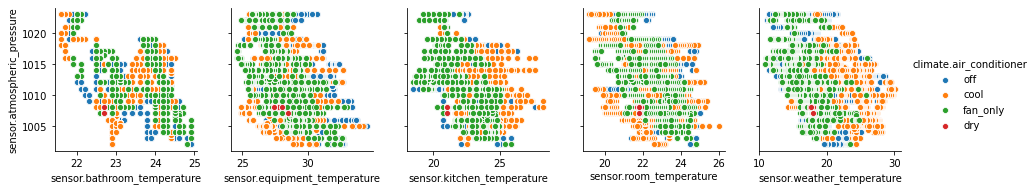

In [163]:
sns.pairplot(data=df_train,
                  y_vars=['sensor.atmospheric_pressure'],
                  x_vars=['sensor.bathroom_temperature',
                          'sensor.equipment_temperature',
                          'sensor.kitchen_temperature',
                          'sensor.room_temperature',
                          'sensor.weather_temperature'],
                  hue='climate.air_conditioner')

- we can see slight dependance, therefore we can use it for prediction

### Now we left only with binary/categorical data:
- binary_sensor.balcony_door
- binary_sensor.kitchen_window
- binary_sensor.room_window
- cover.balcony
- cover.windows
- person.one
- person.two

#### Let's check how they all influence the difference between room and outside temperature

In [43]:
df_train['temp_diff'] = df_train['sensor.room_temperature'] - df_train['sensor.weather_temperature']

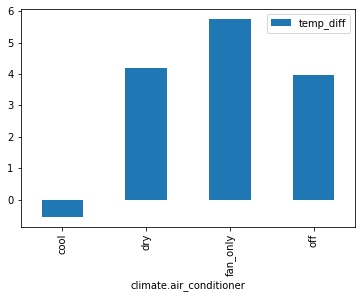

In [44]:
df_train[['climate.air_conditioner', 'temp_diff']].groupby('climate.air_conditioner').mean().plot.bar()

#### Balcony door

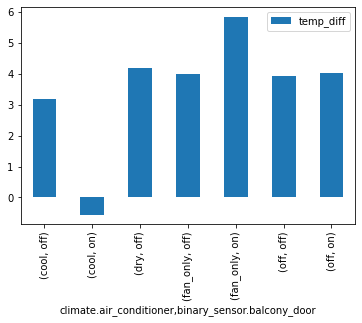

In [51]:
df_train[['climate.air_conditioner', 'binary_sensor.balcony_door', 'temp_diff']].groupby(['climate.air_conditioner', 'binary_sensor.balcony_door']).mean().plot.bar()

- it was expected, but we see, that cooling is much less effective, when balcony door is open
- in other cases room is cooler, if you keep the balcony door open

#### Windows

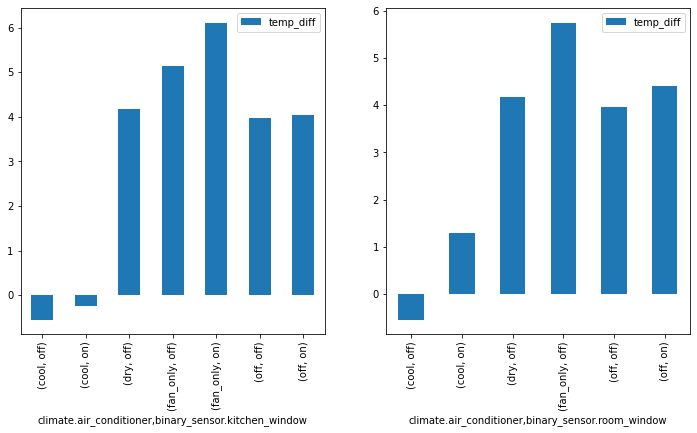

In [57]:
plt.rcParams['figure.figsize'] = (12,6)
fig, ax =plt.subplots(1,2)
df_train[['climate.air_conditioner',
          'binary_sensor.kitchen_window',
          'temp_diff'
         ]].groupby(['climate.air_conditioner',
                     'binary_sensor.kitchen_window'
                    ]).mean().plot.bar(ax=ax[0])
df_train[['climate.air_conditioner',
          'binary_sensor.room_window',
          'temp_diff'
         ]].groupby(['climate.air_conditioner',
                     'binary_sensor.room_window'
                    ]).mean().plot.bar(ax=ax[1])

- to be honest, it's not easy to explain what we see.. looks like that even with AC on it open windows makes room cooler
- anyway, since these dependancies do not change for AC on/off, we can skip these data

#### Windows cover

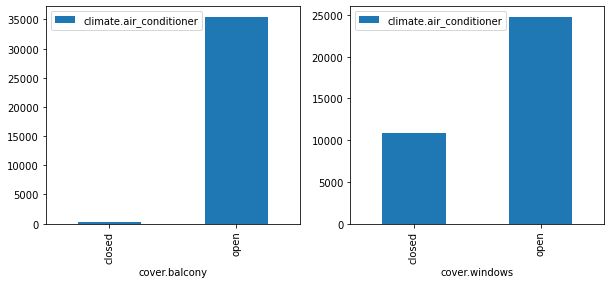

In [62]:
plt.rcParams['figure.figsize'] = (10,4)
fig, ax =plt.subplots(1,2)
df_train[['climate.air_conditioner',
          'cover.balcony'
         ]].groupby(['cover.balcony'
                    ]).count().plot.bar(ax=ax[0])
df_train[['climate.air_conditioner',
          'cover.windows'
         ]].groupby(['cover.windows'
                    ]).count().plot.bar(ax=ax[1])

- as we can see, balcony cover was almost always closed, therefore we have to ignore it

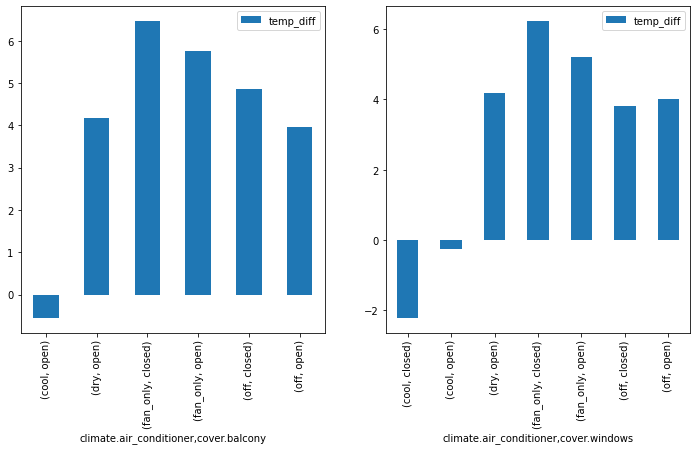

In [58]:
plt.rcParams['figure.figsize'] = (12,6)
fig, ax =plt.subplots(1,2)
df_train[['climate.air_conditioner',
          'cover.balcony',
          'temp_diff'
         ]].groupby(['climate.air_conditioner',
                     'cover.balcony'
                    ]).mean().plot.bar(ax=ax[0])
df_train[['climate.air_conditioner',
          'cover.windows',
          'temp_diff'
         ]].groupby(['climate.air_conditioner',
                     'cover.windows'
                    ]).mean().plot.bar(ax=ax[1])

- for the windows cover there is no strong obvious influence on the room cooling
- we can check it importance while building regression model

#### People inside

In [63]:
df_train[['person.one', 'person.two']]

,person.one,person.two
2020-07-31 19:31:00,not_home,not_home
2020-07-29 18:56:00,home,not_home
2020-07-30 08:10:00,not_home,not_home
2020-07-02 13:44:00,not_home,not_home
2020-07-20 05:05:00,home,home
...,...,...
2020-07-05 08:25:00,home,not_home
2020-07-08 20:04:00,not_home,not_home
2020-07-27 11:58:00,not_home,not_home
2020-07-01 14:20:00,home,not_home


In [64]:
df_train.replace({'not_home':0, 'home':1}, inplace=True)

In [68]:
df_train['people'] = df_train['person.one'] + df_train['person.two']

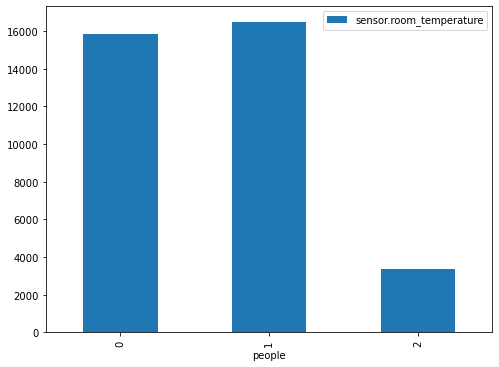

In [96]:
plt.rcParams['figure.figsize'] = (8,6)
df_train[['sensor.room_temperature', 'people']].groupby('people').count().plot.bar()

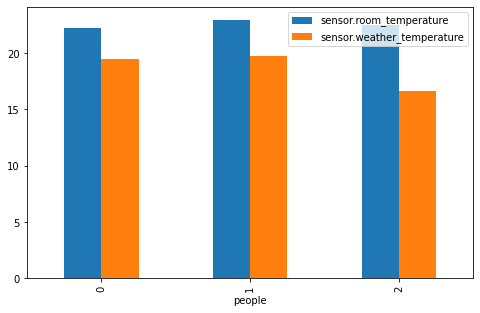

In [100]:
plt.rcParams['figure.figsize'] = (8,5)
df_train[['sensor.room_temperature', 'sensor.weather_temperature', 'people']].groupby('people').mean().plot.bar()

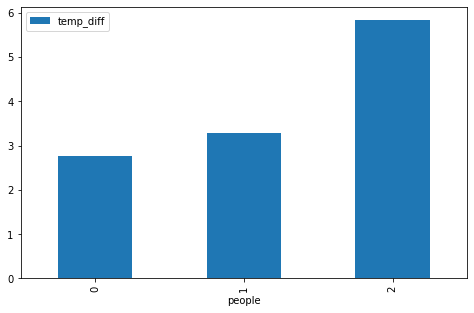

In [101]:
plt.rcParams['figure.figsize'] = (8,5)
df_train[['temp_diff', 'people']].groupby('people').mean().plot.bar()

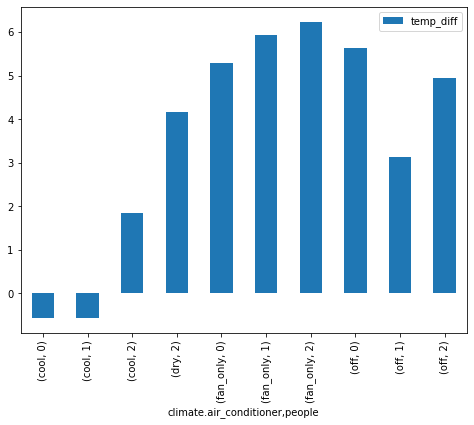

In [77]:
df_train[['climate.air_conditioner', 'temp_diff','people']].groupby(['climate.air_conditioner','people']).mean().plot.bar()

- we can not really say that there is direct dependancy between amount of people inside
- looking at this bar-plot, it looks logical to use 0, 1 and 2 people as separate values (OneHotEncode...)

#### Just out of interest - let's look at how humidity and CO2 level depend on people inside

In [87]:
df.replace({'not_home':0, 'home':1}, inplace=True)
df['people'] = df['person.one'] + df['person.two']

In [88]:
df[1192:].info()

<class 'pandas.core.frame.DataFrame'>
Index: 43448 entries, 2020-07-01 19:52:00 to 2020-07-31 23:59:00
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   sensor.ac_power               43448 non-null  float64
 1   sensor.atmospheric_pressure   43448 non-null  float64
 2   sensor.bathroom_humidity      43448 non-null  float64
 3   sensor.bathroom_temperature   43448 non-null  float64
 4   sensor.equipment_temperature  43448 non-null  float64
 5   sensor.kitchen_humidity       43448 non-null  float64
 6   sensor.kitchen_temperature    43448 non-null  float64
 7   sensor.office_co2             43448 non-null  float64
 8   sensor.room_humidity          43448 non-null  float64
 9   sensor.room_temperature       43448 non-null  float64
 10  sensor.weather_humidity       43448 non-null  float64
 11  sensor.weather_temperature    43448 non-null  float64
 12  binary_sensor.balcony_door    434

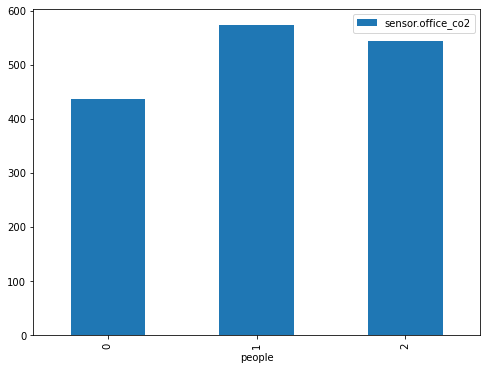

In [90]:
df[['sensor.office_co2','people']].groupby('people').mean().plot.bar()

- maybe our flat owner pay more attention to the air change when has guests? 👀

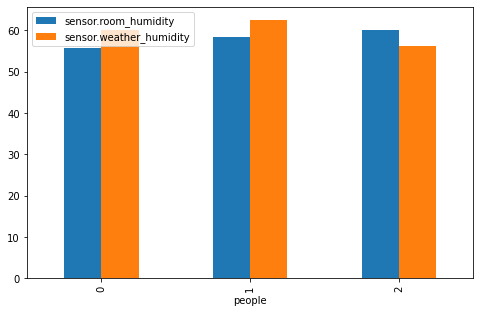

In [102]:
df[['sensor.room_humidity', 'sensor.weather_humidity', 'people']].groupby('people').mean().plot.bar()

- here it looks like only two people noticeably increase inside humidity 👀

# <font color='orange'>CLASSIFICATION PROBLEM</font>

So, let's try to predict the state of conditioning based on other data:
- for simplycity we will label our data as 1='cooling' and 0='not cooling'(all the other modes: off, dry, fan_only)
- as temperature data we will first try just temp_diff - difference between room and outside temperature
- as humidity data we will first try just hum_diff - difference between room and outside humidity
- we will also use some of binary sensors data:
    - binary_sensor.balcony_door
    - cover.windows
    - person.one
    - person.two